# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import csv
from sklearn import preprocessing
import tensorflow as tf
%matplotlib inline


import matplotlib.pyplot as plt
import csv

# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath):
    '''
    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

#train_images, train_labels=readTrafficSigns("/Users/pramod/Downloads/GTSRB_Training/Final_Training/Images")


testing_file = "./traffic-signs-data/test.p"
training_file = './traffic-signs-data/train.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

train_images=train['features']
train_labels=train['labels']
test_images=test['features']
test_labels=test['labels']


X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print(len(train_images))
print(len(train_labels))
print(len(test_images))

39209
39209
12630


In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len (train_images)

# TODO: number of testing examples
n_test = len (test_images)

# TODO: what's the shape of an image?
image_shape = train_images.shape[1:]

# TODO: how many classes are in the dataset
n_classes = len(np.unique(train_labels))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


39209


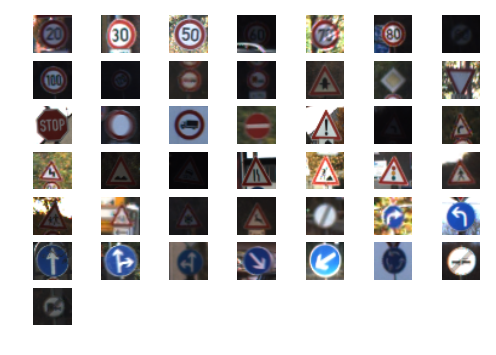

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.


labels=[]
for i  in  range(0,n_classes):
    plt.subplot(7,7,i+1)
    labels.append(test_images[np.where( test_labels == i )[0][0],:,:,:].squeeze())
    img = plt.imshow(test_images[np.where( test_labels == i )[0][0],:,:,:].squeeze())
    plt.axis('off')
print(len(train_labels))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
import numpy
def normalize_scale(image_data):
    a = 0.1
    b = 0.9
    greyscale_min = 0
    greyscale_max = 255
    return (a + ( ( (image_data - greyscale_min)*(b - a) )/( greyscale_max - greyscale_min )))
            
def sci_minmax(X):
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
    return minmax_scale.fit_transform(X)


test_images_t= numpy.zeros((test_images.shape[0],test_images.shape[1]*test_images.shape[2],test_images.shape[3]), dtype=float)
train_images_t= numpy.zeros((train_images.shape[0],train_images.shape[1]*train_images.shape[2],train_images.shape[3]), dtype=float)


for i in range (X_test.shape[3]):
    test_images_t[:,:,i]=normalize_scale(test_images[:,:,:,i].reshape(X_test.shape[0], test_images.shape[1]*test_images.shape[2]))
    train_images_t[:,:,i]=normalize_scale(train_images[:,:,:,i].reshape(train_images.shape[0], train_images.shape[1]*train_images.shape[2]))
    
    

test_images_t=test_images_t.reshape(test_images_t.shape[0], test_images_t.shape[1]*test_images_t.shape[2])
train_images_t=train_images_t.reshape(train_images_t.shape[0], train_images_t.shape[1]*train_images_t.shape[2])

from sklearn.preprocessing import LabelBinarizer

# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(train_labels)
y_train = encoder.transform(train_labels)
y_test = encoder.transform(test_labels)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
is_labels_encod = True

print('Labels One-Hot Encoded')
    

Labels One-Hot Encoded


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:** I Normalized the image data with Min-Max scaling to a range of [0.1, 0.9]. I also tried sci_minmax function directly but the result was not a success.

In order to reduce the total variance in the dataset and simplify the training I normalized each figure with respect to the values0-255 -> 0.1 -0.9. The normalization was performed on each color separately. That was done in order to enhance variation between different colors.

For the target variable I simply transform the type of the different traffic signs using One-Hot Encoding.

There are many normalization techniques namely Min-Max normalization, Z-score normalization and Decimal scaling normalization. 

The type of normalization depends on the model that the data is fed to, so there is no universally best approach.
It is simple and handy to use Min-Max method for normalizing your data, Hence i selected min max approach to solve the problem.


In [5]:

### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.cross_validation import train_test_split

# Get randomized datasets for training and validation
train_features, valid_features, train_labels, valid_labels = train_test_split(
    train_images_t,
    y_train,
    test_size=0.25,
    random_state=0)

print("done with splitting")

done with splitting


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:** I used train_test_split to split with random split for training and validation data split.

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** Used multi layer perceptron model with three hidden layers wth RELU activation, width of hidden layer is 256. For optimizer I used Gradient Descent Optimizer and calculated the cost using  softmax cross entropy.

In [15]:
#### # Parameters
import datetime
from time import mktime

n_input = train_features.shape[1]
n_classes = train_labels.shape[1]

# Parameters
learning_rate =  0.001
training_epochs = 35
batch_size = 25

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

 
n_hidden_layer1 = 256 #1st layer number of features
n_hidden_layer2 = 256 # 2nd layer number of features
n_hidden_layer3 = 256 


# Store layers weight & bias
weights = {
    'hidden_layer1': tf.Variable(tf.random_normal([n_input, n_hidden_layer1], mean=0, stddev=0.01)),
    'hidden_layer2': tf.Variable(tf.random_normal([n_hidden_layer1, n_hidden_layer2], mean=0, stddev=0.01)),
    'hidden_layer3': tf.Variable(tf.random_normal([n_hidden_layer2, n_hidden_layer3], mean=0, stddev=0.01)),
    'out': tf.Variable(tf.random_normal([n_hidden_layer3, n_classes]))
}
biases = {
    'hidden_layer1': tf.Variable(tf.random_normal([n_hidden_layer1], mean=0, stddev=0.01)),
    'hidden_layer2': tf.Variable(tf.random_normal([n_hidden_layer2], mean=0, stddev=0.01)),
    'hidden_layer3': tf.Variable(tf.random_normal([n_hidden_layer3], mean=0, stddev=0.01)),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

 
# Hidden layer 1 with RELU activation
layer_1 = tf.add(tf.matmul(x, weights['hidden_layer1']), biases['hidden_layer1'])
layer_1 = tf.nn.relu(layer_1)

# Hidden layer 2 with RELU activation

layer_2 = tf.add(tf.matmul(layer_1, weights['hidden_layer2']), biases['hidden_layer2'])
layer_2 = tf.nn.relu(layer_2)

# Hidden layer 3 with RELU activation

layer_3 = tf.add(tf.matmul(layer_2, weights['hidden_layer3']), biases['hidden_layer3'])
layer_3 = tf.nn.relu(layer_3)

# Output layer with linear activation
logits = tf.matmul(layer_3, weights['out']) + biases['out']

prediction = tf.nn.softmax(logits)
predict = tf.argmax(logits, 1) 
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

# Initializing the variables
sess = tf.Session()

sess.run(tf.initialize_all_variables())
train_acc_batch =[]
val_acc_batch =[]
train_cost_batch =[]
batches = []
# Launch the graph

start=datetime.datetime.now().time()
before = datetime.datetime.now()
print("Start %s" %(start))
for epoch in range(training_epochs):
    for offset in range(0, train_labels.shape[0], batch_size):
        end = offset + batch_size
        batch_features = train_features[offset:end]
        batch_labels = train_labels[offset:end]
        sess.run([optimizer], feed_dict={x: batch_features, y: batch_labels})
    if epoch % 10 == 0:
        batches.append(offset)
        c = sess.run(cost,feed_dict={x: batch_features, y: batch_labels})
        a = sess.run(  accuracy , feed_dict={x: batch_features, y: batch_labels})
        print("Accuracy training:", "{:.5f}".format(a))
        train_cost_batch.append([c])
        train_acc_batch.append([a])
        a = sess.run(  accuracy , feed_dict= {x: valid_features, y:  valid_labels}) 
        print("Accuracy Validation:", "{:.5f}".format(a))
        val_acc_batch.append([a])

    # Test model
a = sess.run(  accuracy , feed_dict={x: test_images_t, y:  y_test}) 
print("Final Accuracy On Test:", a)

end=datetime.datetime.now().time()
after  = datetime.datetime.now()
print("End %s" %(end))
total=abs(mktime(before.timetuple()) - mktime(after.timetuple()))
print("Time Taken: %s seconds" %(total))


Start 11:45:00.932583
Accuracy training: 0.33333
Accuracy Validation: 0.09089
Accuracy training: 1.00000
Accuracy Validation: 0.66418
Accuracy training: 1.00000
Accuracy Validation: 0.81679
Accuracy training: 1.00000
Accuracy Validation: 0.88300
Final Accuracy On Test: 0.802771
End 11:50:37.826310
Time Taken: 337.0 seconds


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I used GradientDescentOptimizer with batch size as 25 and epochs 30, My learning rate was 0.001 

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:** I used references to our lessons and my mentor also helped me with his example model. Additionally I tried different models and feed forward worked for me good accuracy and simple to understand implementation. I also used refered some problems solved using MNIST Dataset.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:** I downloaded 5 signs from internet, STOP sign, T Junction Sign, Straight Arrow Sign, School Walk Sign and Deer Crossing Sign. I could not get blurred signs to work my last two example signs were blurred our hence they failed.

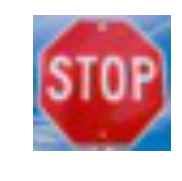

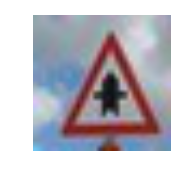

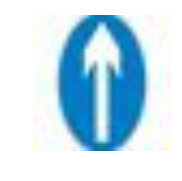

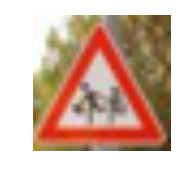

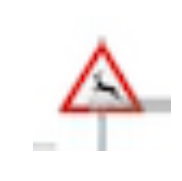

In [16]:
#Load the data
import os
signs = []
for filename in os.listdir('newsigns'):
    sign = plt.imread('newsigns/' + filename)
    signs.append(sign)

for i in range(len(signs)):
    fig = plt.figure()
    fig.add_subplot(2,3,i+1)
    plt.axis('off')
    plt.imshow(signs[i])
    


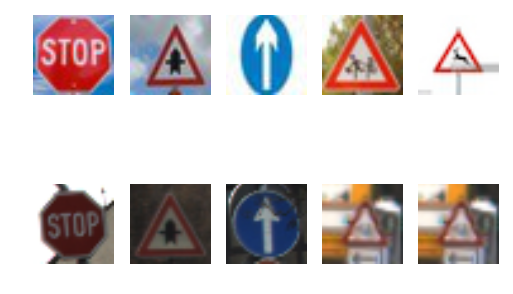

In [17]:
image = np.array(signs)
X_new = numpy.zeros((image.shape[0],image.shape[1]*image.shape[2],image.shape[3]), dtype=float)

for i in range (image.shape[3]):
    X_new[:,:,i] = normalize_scale(image[:,:,:,i].reshape(image.shape[0], image.shape[1]*image.shape[2]))
    
X_new = X_new.reshape(X_new.shape[0], X_new.shape[1]*X_new.shape[2])

preds = sess.run(predict, feed_dict = {x: X_new})

fig = plt.figure()
for i in range(1,6):
    fig.add_subplot(2,5,i)
    plt.imshow(image[i-1,:,:,:]) 
    plt.axis('off')
    fig.add_subplot(2,5,i+5)
    plt.imshow(labels[preds[i-1]])
    plt.axis('off')

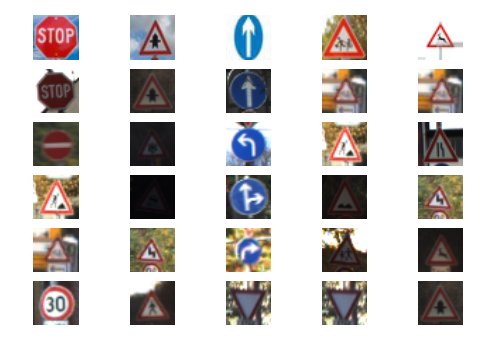

In [18]:
#Review-2 : Student documents the performance of the model when tested on the captured images and compares it to the results of testing on the dataset.


top_preds = sess.run(tf.nn.top_k(prediction , k=5), feed_dict={x: X_new})
fig = plt.figure()

for i in range(1,6):
  
    fig.add_subplot(6,5,i)
    plt.imshow(image[i-1,:,:,:]) 
    plt.axis('off')
    for j in [0,1,2,3,4]:
      fig.add_subplot(6,5,i+(j+1)*5)
      plt.imshow(labels[top_preds.indices[i-1][j]])
      plt.axis('off')

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:** For the test my accuracy was 80% but when I try it on my captured images from internet i got accuracy of roughly 60%. My model does not recognize blurry images well. Maybe I need to do a lot more pre-processing on captured images before they are put into the model.Additionally I tried on simpler images and got a 100% accuracy at times, but i felt these were challenging images hence decided to keep it as part of final project.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:** We get very accurate prediction for all signs are fairly correct except for walk sign. Probabilities for all signs was closer to 1 except one of the sign which was 0.7

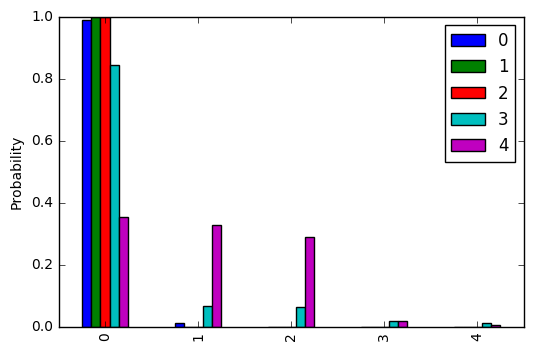

In [19]:

import pandas as pd
fig = plt.figure()


A=pd.DataFrame(top_preds.values.transpose())

A.plot(kind='bar').set_ylabel('Probability')

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.